# Немного математической теории
Напишем функцию, которая будет приближённо считать гипербалический синус для небольших $x$:
$$\sh (x) = x + \frac{x^3}{3!} + \frac{x^5}{5!} + \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N \frac{x^{2n+1}}{(2n+1)!} + R(x),$$
причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма так называемого ряда Тейлора:
$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [7]:
import math  # Библиотека, содержащая популярные математические функции и константы. Например: число Пи, логарифмы, тригонометрические функции 

ITERATIONS = 20  # Константа, в которой содержится число членов частичной суммы

def my_sinh(x):  # Функция, которая будет считать гипербалический синус через ряд тейлора
    """
    Вычисление гипербалического синуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0
    """  # Фраза, которая будет написана при вызове справки о функции 
    power = x  # Переменной power (степень) будут присваиваться значения х в нечётных степенях
    fac = 1  # Переменной fac (факториал) будут присваиваться значения факториала, так как факториал это произведение, то для правильного значения мы должны присвоит fac значения 1, если fac = 0, то значение произведения будет 0
    partial_sum = x  # Переменной partial_sum (частичная сумма) будут присвоены значения частичной суммы на каждом шаге
    for n in range(1, ITERATIONS):  # Cчитаем частичную сумму в цикле 
        power *= x**2  # В цикле постепенно считаем степень
        fac *= (2*n) * (2*n + 1)  # Считаем факториал
        partial_sum += power / fac  # Считаем частичную сумму
    
    return partial_sum  # Выводим получившееся значение частичной суммы

help(math.sinh)  # Cправка библиотечной функции sh
help(my_sinh)  # Справка нашей функции sh

print(math.sinh(0.4))  # Вывод значения библиотечной функции sh(0.4)
print(my_sinh(0.4))  # Вывод значения нашей функции sh(0.4)

Help on built-in function sinh in module math:

sinh(x, /)
    Return the hyperbolic sine of x.

Help on function my_sinh in module __main__:

my_sinh(x)
    Вычисление гипербалического синуса при помощи частичного суммирования
    ряда Тейлора для окрестности 0

0.4107523258028155
0.4107523258028155


Но это ещё не все возможности нашей функции. Она может считать гипербалический синус комплексного аргумента и даже точнее библиотечной. 

In [8]:
import cmath  # Модуль для работы с комплексными числами

complex_angle = cmath.asinh(5)  # Угол, на котором гипербалический синус достигает пяти
print('"Угол", на котором синус достигает пяти:', complex_angle)  # Вывод значения угла

print("Достигает ли пяти наш синус?", my_sinh(complex_angle))  # Выводим значенияе нашего гипербалического синуса в найденом угле
print("А библиотечный?", cmath.sinh(complex_angle))  # Выводим значенияе библиотечного гипербалического синуса в найденом угле 

"Угол", на котором синус достигает пяти: (2.3124383412727525+0j)
Достигает ли пяти наш синус? (5+0j)
А библиотечный? (4.999999999999999+0j)


Посмотри похож ли график нашей функции на библиотечный.


<function my_sinh at 0x000001D053E397E0> <numpy.vectorize object at 0x000001D04B8D0C10>


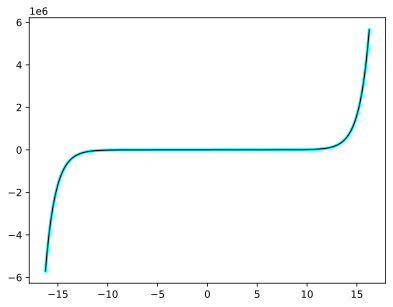

In [9]:
import matplotlib.pyplot as plt  # Библиотека для построения графиков
%config InlineBackend.figure_formats = ['svg',  'pdf']  # Разрешения графика svg и pdf
%matplotlib inline


import matplotlib.pyplot as plt  # Библиотека для построения графиков
import numpy as np  # Библиотека Python с массивами, матрицами и функциями для них

vs = np.vectorize(my_sinh)  # Векторизация функции my_sinh
print(my_sinh, vs)

angles = np.r_[-16.25:16.25:0.01]  # Значения х в диапазоне от -16.25 до 16.25 с шагом 0.01
plt.plot(angles, np.sinh(angles), linewidth=3.0, color='cyan')  # Построение библиотечной функции sh(x) толщиной 3 голубого цвета
plt.plot(angles, vs(angles), linewidth=1.0, color='black')  # Построение нашей функции sh(x) тольщиной 1 чёрного цвета
plt.show()  #